# 9.4 Google Colab con algoritmo Otsu

**Equipo 14**
* José Francisco Muñoz Del Ángel A01794174
* Jorge Fernández Lara A01793062
* Kevin Dueñas Aguirre A01283104
* Francisco Marmolejo Martínez A01794882
* Gabriel Paredes Garza A00797698

## Introducción

La umbralización se utiliza para crear una imagen binaria atravez de una imagen en escala de grises. 

Seleccionar un valor de umbral (T): El valor de umbral puede ser determinado manualmente por el usuario o automáticamente por algoritmos, como el método de Otsu que busca optimizar este valor.

Aplicar el umbral a la imagen en escala de grises: Para cada píxel en la imagen, se compara su valor de intensidad (un número entre 0 y 255 en una imagen de 8 bits) con el valor de umbral.

* Si la intensidad del píxel es mayor que el umbral, el píxel se convierte a blanco (generalmente representado por el valor 255).
* Si la intensidad del píxel es menor o igual al umbral, el píxel se convierte a negro (representado por el valor 0).

Crear la imagen binaria resultante: Después de aplicar el umbral a todos los píxeles, se obtiene una imagen binaria donde los objetos de interés (por ejemplo, aquellos píxeles más brillantes que el umbral) se destacan claramente contra el fondo.

El **método de Otsu** es una técnica popular para el umbralizado automático de imágenes, que se utiliza para separar el fondo de los objetos de interés en imágenes en escala de grises. Esta técnica, desarrollada por Nobuyuki Otsu en 1979, elige el umbral que minimiza la varianza dentro de las clases (objetos y fondo) y, al mismo tiempo, maximiza la varianza entre las clases. El método de Otsu puede aplicarse tanto para umbralización simple (single thresholding) como para umbralización múltiple (multi-thresholding).

## Desarrollo

### Librerias 

In [22]:
# Crgamos las librerias necesarias para el desarrollo del programa.
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
from skimage import io, color, filters
import numpy as np
import cv2
from PIL import Image, ImageOps

### Single Thresholding <a class="anchor" id="single" ></a>



La **Single Thresholding** o umbralización simple es una técnica de procesamiento de imágenes que implica convertir una imagen en escala de grises a una imagen binaria, basada en un valor de umbral predefinido o seleccionado manualmente. Esta técnica asigna a todos los píxeles de la imagen uno de dos posibles valores (generalmente 0 para negro y 255 para blanco) dependiendo de si su intensidad es menor o mayor que el umbral.

Este método de umbralización simple de Otsu busca un solo umbral que mejor separe los píxeles de una imagen en dos clases: píxeles de fondo y píxeles de objeto. 

/tmp/ipykernel_5466/1193236779.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.


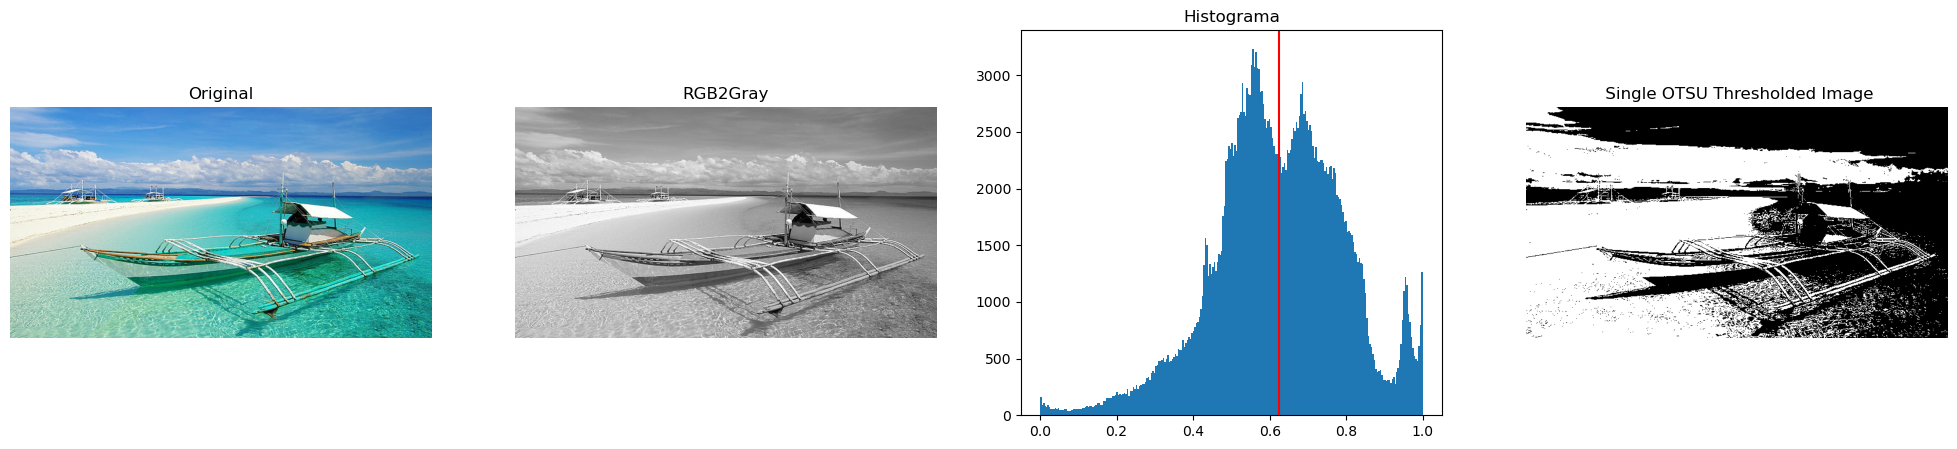

In [23]:
# Cargamos la imagen un barco. 
org_image = io.imread('Catamaran.jpg')

# Convertimos la imagen a escala de grises.
image = color.rgb2gray(org_image)                           # Convertimos la imagen a rgb2gray.
thresh = threshold_otsu(image)                              # Calculamos el umbral de Otsu.
binary = image > thresh                                     # Aplicamos el umbral.  

# Definimos una figura para mostrar la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))          # Creamos una figura con 4 subfiguras.
ax = axes.ravel()                                           # Convertimos los ejes a un array.     
ax[0] = plt.subplot(1, 4, 1)                                # Creamos la primera subfigura.
ax[1] = plt.subplot(1, 4, 2)                                # Creamos la segunda subfigura.
ax[2] = plt.subplot(1, 4, 3)                                # Creamos la tercera subfigura.
ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.

# Mostramos la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
ax[0].imshow(org_image)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(image, cmap='gray')                                         # Mostramos la imagen en escala de grises.  
ax[1].set_title('RGB2Gray')
ax[1].axis('off')

ax[2].hist(image.ravel(), bins=256)                         # Mostramos el histograma de la imagen en escala de grises, con 256 bins.  
ax[2].set_title('Histograma')
ax[2].axvline(thresh, color='r')

ax[3].imshow(binary, cmap=plt.cm.gray)                      # Mostramos la imagen umbralizada.
ax[3].set_title(' Single OTSU Thresholded Image')
ax[3].axis('off')

plt.show()

Con el método Single-OTSU Tresholding podemos ver que el contraste entre el cielo y el mar no es suficientemente diferente y lo agrupa. Este método es más útil para imágenes con alto contraste entre el objeto y el fondo. Su efectividad disminuye en imágenes con gradientes suaves o con múltiples objetos de diferentes intensidades.

Por otro lado no podemos ver la profundidad del agua en la playa, este metodo es sensible a las variaciones de iluminación y al ruido en la imagen. Esto puede resultar en ea de los objetos de interés, especialmente si el fondo y los objetos tienen intensidades de gris similares en algunas áreas.

### Multi Thresholding <a class="anchor" id="multi" ></a>

El método Multi-OTSU Thresholding es una técnica avanzada de segmentación de imágenes que permite separar una imagen en múltiples segmentos o clases basándose en las intensidades de los píxeles. Este método es particularmente útil para distinguir entre diferentes características en una imagen compleja. Al aplicar el Multi-OTSU Thresholding para separar una imagen en tres segmentos claros, podemos lograr una discriminación efectiva entre diferentes elementos de una escena con variaciones sutiles de intensidad.

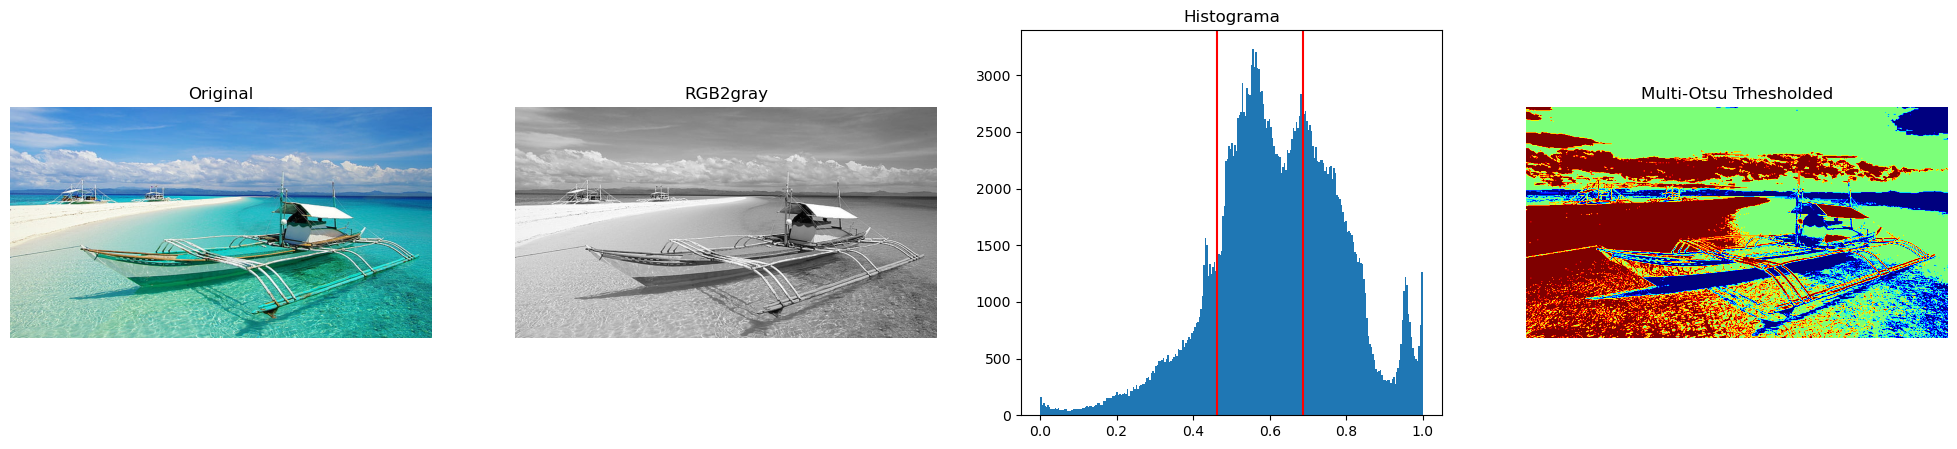

In [24]:
# Se definen los valores de los umbrales para la imagen, en este caso son 3.
thresholds = threshold_multiotsu(image)                             # Calculamos los umbrales de Otsu.

# Usamos los umbrales para obtener las regiones de la imagen, es decir, los valores de los pixeles.
regions = np.digitize(image, bins=thresholds)

# Se definen las figuras para mostrar la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

# Mostamos la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
ax[0].imshow(org_image)                                             # Mostramos la imagen original.      
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(image, cmap='gray')                                    # Mostramos la imagen en escala de grises.
ax[1].set_title('RGB2gray')
ax[1].axis('off')

ax[2].hist(image.ravel(), bins=256)                                 # Mostramos el histograma de la imagen en escala de grises, con 256 bins.
ax[2].set_title('Histograma')
for thresh in thresholds:
    ax[2].axvline(thresh, color='r')

ax[3].imshow(regions, cmap='jet')                                   # Mostramos la imagen umbralizada.
ax[3].set_title('Multi-Otsu Trhesholded')
ax[3].axis('off')

plt.subplots_adjust()

plt.show()

Segmento de Arena y Nubes: Un umbral puede ser efectivamente aplicado para distinguir la arena blanca brillante y las nubes, posiblemente agrupándolas en una categoría debido a sus altas intensidades de píxeles. Esta categoría podría representarse visualmente con un color específico, como el rojo, para destacar su claridad en comparación con otros elementos de la imagen.

Segmento del Mar y el Cielo Claro: Otro umbral podría separar las áreas de color claro del mar y las partes claras del cielo, agrupándolas en una segunda categoría. Esta diferenciación se basaría en la distinción de sus intensidades medias a bajas, que podrían ser representadas en color verde. Esta categoría refleja las áreas con tonalidades más suaves que contrastan con la brillantez de la arena y las nubes.

Segmento de la Tierra y el Cielo Oscuro: Un tercer umbral podría identificar la tierra en el horizonte y las partes más oscuras del cielo, agrupándolas en una tercera categoría. Estas áreas serían detectadas por sus bajas intensidades de píxeles, indicativas de colores más oscuros en comparación con el resto de la escena, y podrían visualizarse en color azul.

### Limitantes <a class="anchor" id="multi" ></a>

**Suposición de Bimodalidad:** Otsu asume que la imagen tiene una distribución bimodal de intensidades, lo que significa que es ideal para imágenes donde el fondo y el objeto se pueden distinguir claramente por sus intensidades. En imágenes donde esta suposición no se cumple, el rendimiento del algoritmo puede decaer.

**Sensibilidad a la Tamaño de los Objetos:** En imágenes con múltiples objetos o cuando hay una gran disparidad en el tamaño de los objetos, Otsu puede no encontrar el umbral óptimo que segmente correctamente todos los objetos.

**Rendimiento en Condiciones de Iluminación Variable:** Aunque Otsu es generalmente más robusto que la umbralización simple ante variaciones de iluminación, su rendimiento aún puede verse afectado en imágenes con iluminación no uniforme o con sombras pronunciadas.

**Elección del Umbral:** La eficacia de la umbralización simple depende en gran medida de la elección correcta del valor de umbral, el cual es establecido de manera manual o mediante un criterio predefinido. Esta elección puede ser subóptima si la imagen tiene variaciones en la iluminación o contrastes no uniformes.

**Sensibilidad a la Iluminación y al Ruido:** La umbralización simple es sensible a las variaciones de iluminación y al ruido en la imagen. Esto puede resultar en la segmentación errónea de los objetos de interés, especialmente si el fondo y los objetos tienen intensidades de gris similares en algunas áreas.

**Aplicabilidad Limitada:** Este método es más adecuado para imágenes con alto contraste entre el objeto y el fondo. Su efectividad disminuye en imágenes con gradientes suaves o con múltiples objetos de diferentes intensidades.

/tmp/ipykernel_5466/976271656.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.


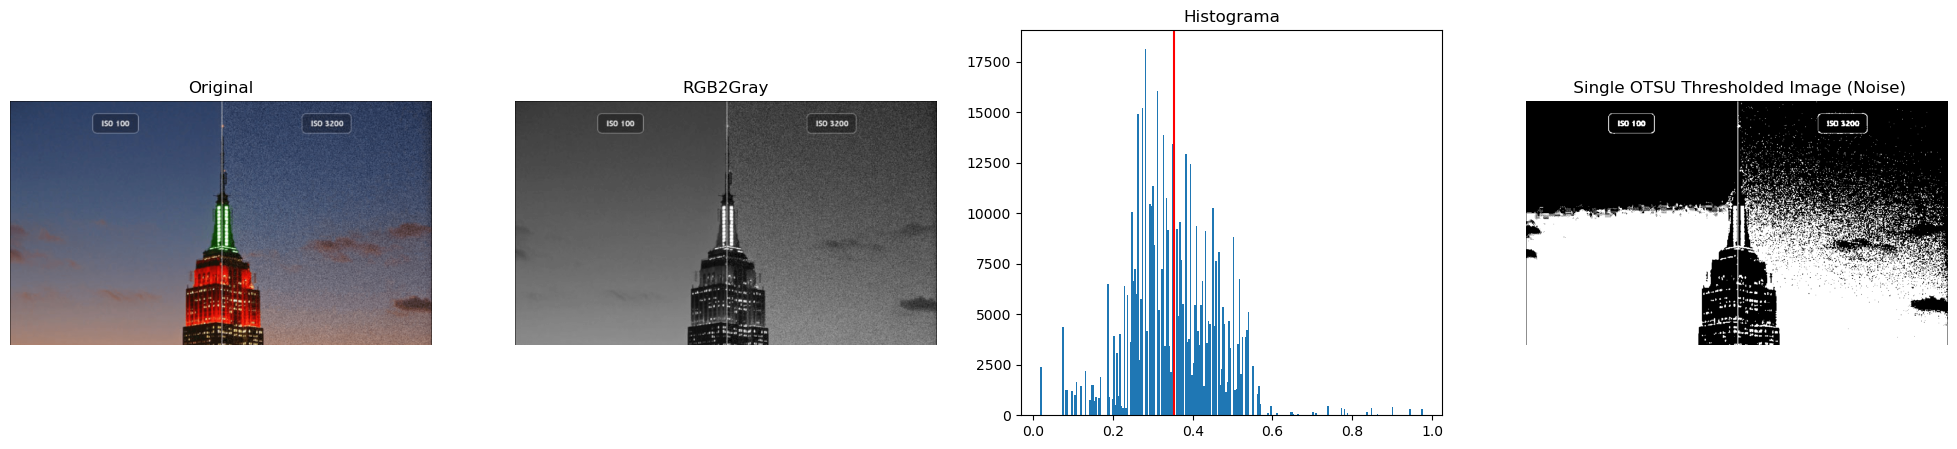

In [25]:
# Cargamos la imagen un barco. 
org_image = io.imread('Noise.jpg')

# Convertimos la imagen a escala de grises.
image = color.rgb2gray(org_image)                           # Convertimos la imagen a rgb2gray.
thresh = threshold_otsu(image)                              # Calculamos el umbral de Otsu.
binary = image > thresh                                     # Aplicamos el umbral.  

# Definimos una figura para mostrar la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))          # Creamos una figura con 4 subfiguras.
ax = axes.ravel()                                           # Convertimos los ejes a un array.     
ax[0] = plt.subplot(1, 4, 1)                                # Creamos la primera subfigura.
ax[1] = plt.subplot(1, 4, 2)                                # Creamos la segunda subfigura.
ax[2] = plt.subplot(1, 4, 3)                                # Creamos la tercera subfigura.
ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.

# Mostramos la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
ax[0].imshow(org_image)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(image, cmap='gray')                                         # Mostramos la imagen en escala de grises.  
ax[1].set_title('RGB2Gray')
ax[1].axis('off')

ax[2].hist(image.ravel(), bins=256)                         # Mostramos el histograma de la imagen en escala de grises, con 256 bins.  
ax[2].set_title('Histograma')
ax[2].axvline(thresh, color='r')

ax[3].imshow(binary, cmap=plt.cm.gray)                      # Mostramos la imagen umbralizada.
ax[3].set_title(' Single OTSU Thresholded Image (Noise)')
ax[3].axis('off')

plt.show()

El ruido en una imagen puede distorsionar la distribución de intensidades de píxeles, llevando a la selección incorrecta del umbral. Aunque Otsu intenta minimizar el error global al elegir el umbral, el ruido excesivo puede llevar a segmentaciones pobres o incorrectas.

/tmp/ipykernel_5466/2826890674.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.


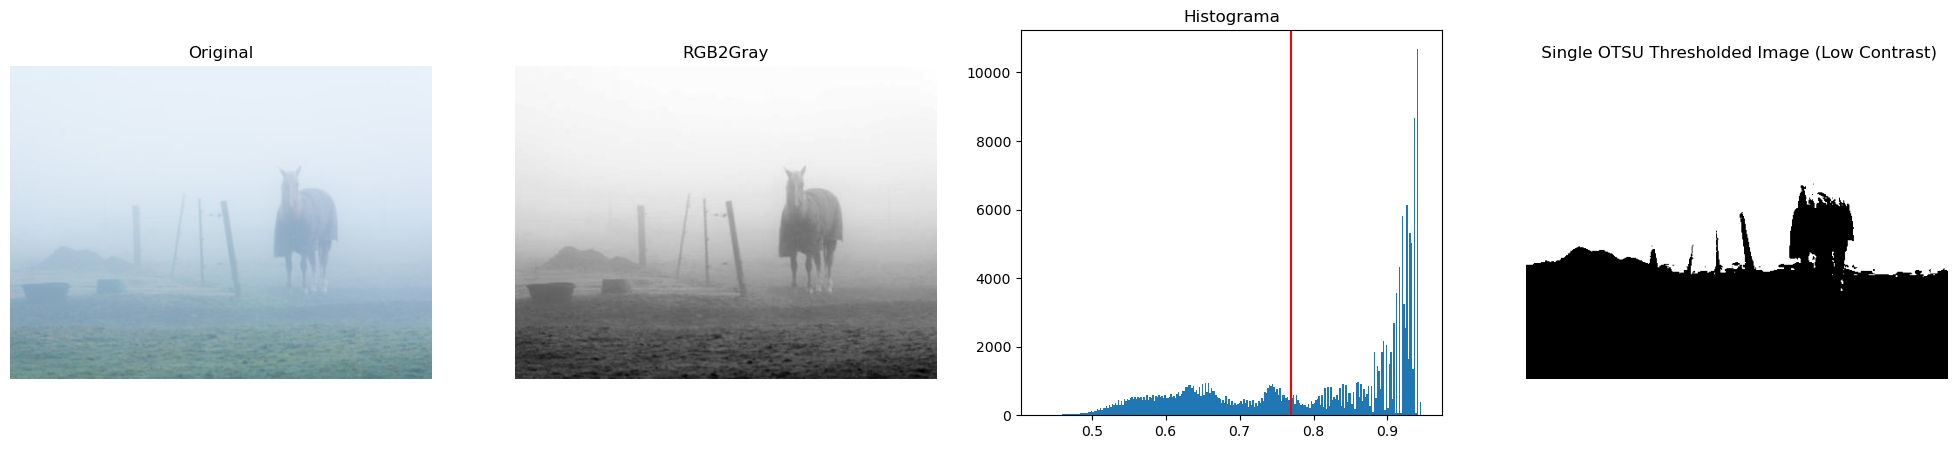

In [26]:
# Cargamos la imagen un barco. 
org_image = io.imread('Low_Contrast.jpg')

# Convertimos la imagen a escala de grises.
image = color.rgb2gray(org_image)                           # Convertimos la imagen a rgb2gray.
thresh = threshold_otsu(image)                              # Calculamos el umbral de Otsu.
binary = image > thresh                                     # Aplicamos el umbral.  

# Definimos una figura para mostrar la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))          # Creamos una figura con 4 subfiguras.
ax = axes.ravel()                                           # Convertimos los ejes a un array.     
ax[0] = plt.subplot(1, 4, 1)                                # Creamos la primera subfigura.
ax[1] = plt.subplot(1, 4, 2)                                # Creamos la segunda subfigura.
ax[2] = plt.subplot(1, 4, 3)                                # Creamos la tercera subfigura.
ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.

# Mostramos la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
ax[0].imshow(org_image)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(image, cmap='gray')                                         # Mostramos la imagen en escala de grises.  
ax[1].set_title('RGB2Gray')
ax[1].axis('off')

ax[2].hist(image.ravel(), bins=256)                         # Mostramos el histograma de la imagen en escala de grises, con 256 bins.  
ax[2].set_title('Histograma')
ax[2].axvline(thresh, color='r')

ax[3].imshow(binary, cmap=plt.cm.gray)                      # Mostramos la imagen umbralizada.
ax[3].set_title(' Single OTSU Thresholded Image (Low Contrast)')
ax[3].axis('off')

plt.show()

En imágenes donde el contraste entre el objeto de interés y el fondo es bajo, la distribución de intensidades puede no tener picos claramente definidos. Esto hace que sea difícil para el algoritmo de Otsu determinar un umbral que separe eficazmente estos dos componentes.

/tmp/ipykernel_5466/2154735605.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.


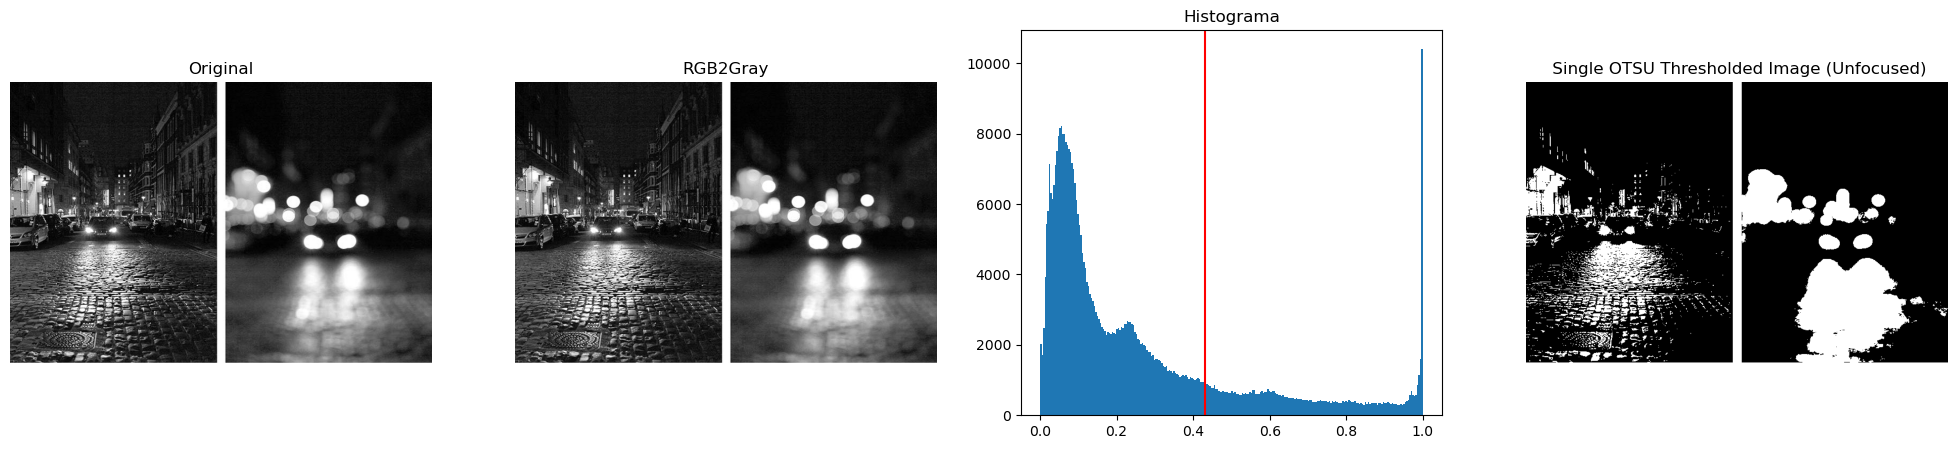

In [27]:
# Cargamos la imagen un barco. 
org_image = io.imread('Unfocused.jpg')

# Convertimos la imagen a escala de grises.
image = color.rgb2gray(org_image)                           # Convertimos la imagen a rgb2gray.
thresh = threshold_otsu(image)                              # Calculamos el umbral de Otsu.
binary = image > thresh                                     # Aplicamos el umbral.  

# Definimos una figura para mostrar la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))          # Creamos una figura con 4 subfiguras.
ax = axes.ravel()                                           # Convertimos los ejes a un array.     
ax[0] = plt.subplot(1, 4, 1)                                # Creamos la primera subfigura.
ax[1] = plt.subplot(1, 4, 2)                                # Creamos la segunda subfigura.
ax[2] = plt.subplot(1, 4, 3)                                # Creamos la tercera subfigura.
ax[3] = plt.subplot(1, 4, 4, sharex=ax[0], sharey=ax[0])    # Creamos la cuarta subfigura.

# Mostramos la imagen original, la imagen en escala de grises, el histograma y la imagen umbralizada.
ax[0].imshow(org_image)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(image, cmap='gray')                                         # Mostramos la imagen en escala de grises.  
ax[1].set_title('RGB2Gray')
ax[1].axis('off')

ax[2].hist(image.ravel(), bins=256)                         # Mostramos el histograma de la imagen en escala de grises, con 256 bins.  
ax[2].set_title('Histograma')
ax[2].axvline(thresh, color='r')

ax[3].imshow(binary, cmap=plt.cm.gray)                      # Mostramos la imagen umbralizada.
ax[3].set_title(' Single OTSU Thresholded Image (Unfocused)')
ax[3].axis('off')

plt.show()

Si una imagen contiene múltiples objetos de interés con distintos niveles de intensidad, o si el fondo de la imagen tiene variaciones significativas, la distribución de intensidades podría ser multimodal. En estos casos, un único umbral no puede segmentar eficazmente todos los objetos de interés.

In [28]:
import matplotlib.image
img = data.page()
matplotlib.image.imsave('img.jpg', img)

In [29]:
from image_slicer import slice

n = 4
slice('img.jpg', n)

(<Tile #1 - img_01_01.png>,
 <Tile #2 - img_01_02.png>,
 <Tile #3 - img_02_01.png>,
 <Tile #4 - img_02_02.png>)

In [30]:
def swahe(image, window_size):
    # Convierte la imagen a escala de grises si no lo está
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Tamaño de la imagen
    height, width = gray.shape

    # Inicializa la imagen resultante
    result = np.zeros_like(gray)

    # Itera sobre la imagen con la ventana deslizante
    for y in range(0, height, window_size):
        for x in range(0, width, window_size):
            # Define la región local utilizando la ventana deslizante
            roi = gray[y:y+window_size, x:x+window_size]

            # Aplica la ecualización de histograma adaptativa a la región local
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
            roi_equalized = clahe.apply(roi)

            # Coloca la región ecualizada en la imagen resultante
            result[y:y+window_size, x:x+window_size] = roi_equalized
            

    return result


In [31]:
img = cv2.imread('img_01_01.png')
img1 = cv2.imread('img_01_02.png')
img2 = cv2.imread('img_02_01.png')
img3 = cv2.imread('img_02_02.png')

imgs = [img, img1, img2, img3]

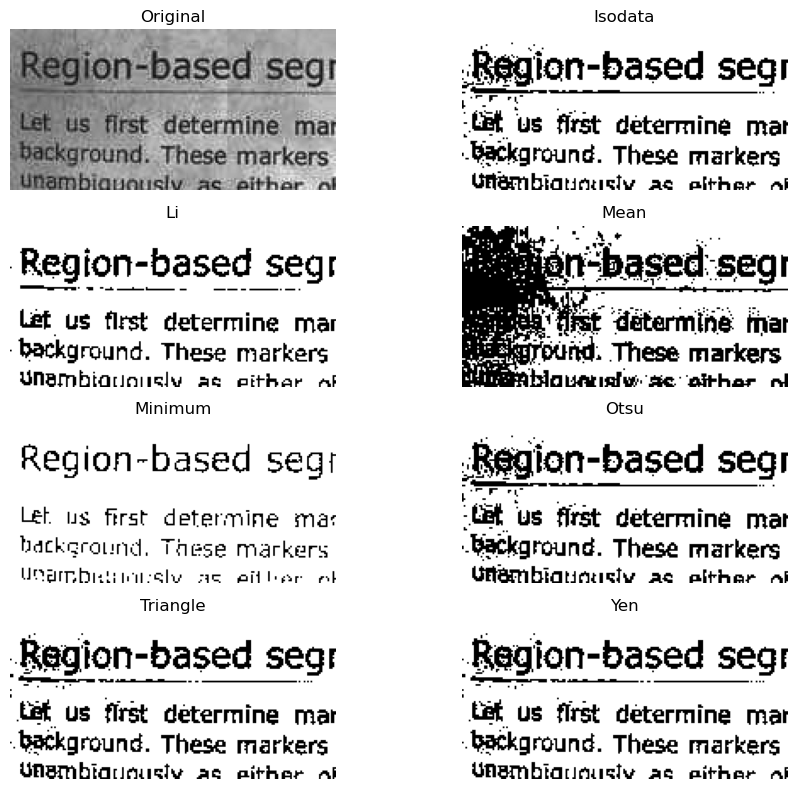

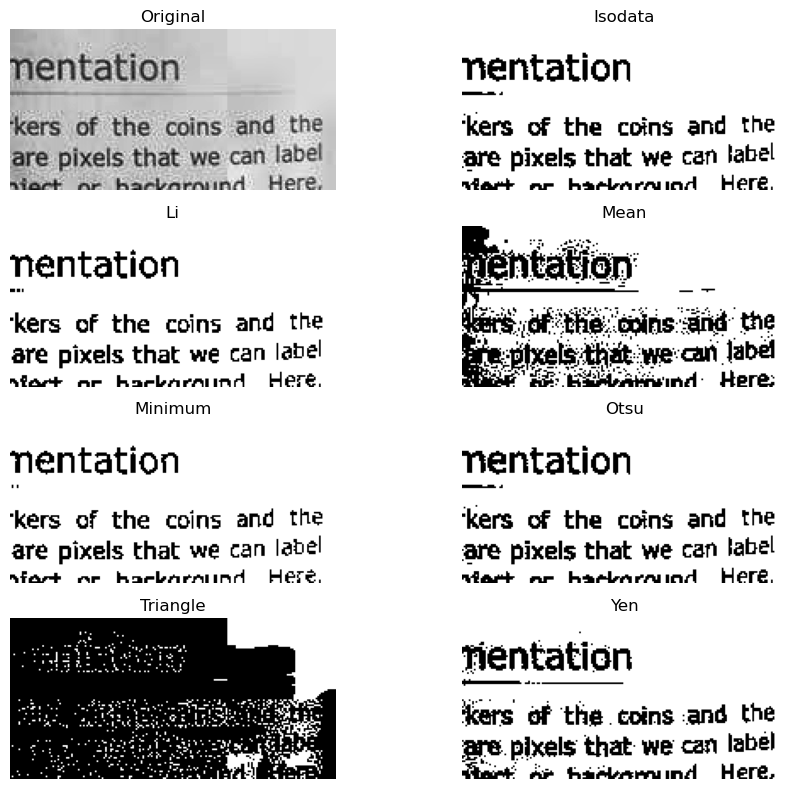

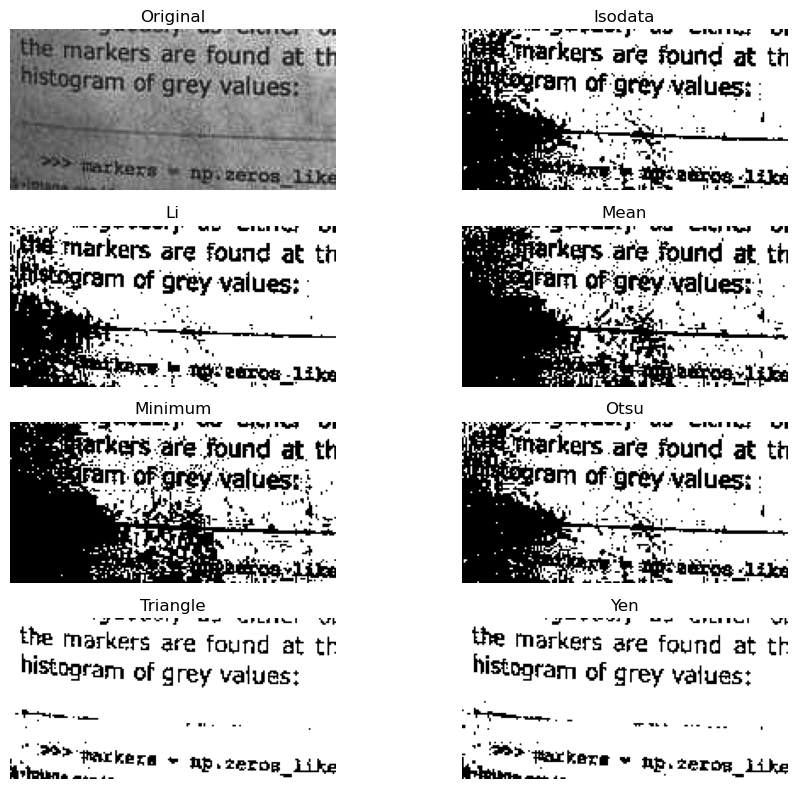

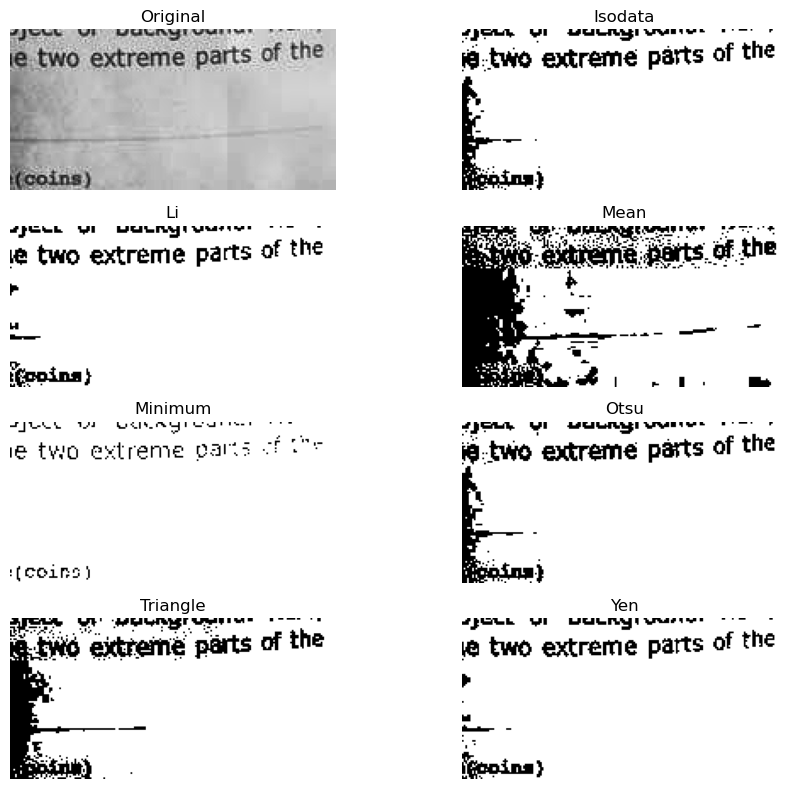

In [32]:
for img in imgs:
    result = swahe(img, window_size=128)
    fig, ax = try_all_threshold(result, figsize=(10, 8), verbose=False)
    plt.show()

## **Discusión de resultados**


El algoritmo de Otsu representa un método avanzado de umbralización que ha encontrado aplicaciones extensas en el procesamiento de imágenes, especialmente en la segmentación automática de objetos del fondo. Su principal ventaja radica en la capacidad de determinar automáticamente el valor de umbral óptimo, basándose en la minimización de la varianza intra-clase o, alternativamente, en la maximización de la varianza entre clases. Esto lo hace especialmente útil en situaciones donde la imagen tiene una clara distribución bimodal de intensidades, permitiendo una segmentación eficaz sin intervención manual. La eficiencia y simplicidad de Otsu lo convierten en una herramienta predilecta en muchas aplicaciones, desde análisis médicos hasta reconocimiento de patrones y procesamiento de señales.

Tambien, el algoritmo de Otsu posee limitaciones significativas. Su presupuesto de bimodalidad en la distribución de intensidades de la imagen no siempre se cumple, especialmente en imágenes con múltiples objetos de interés, iluminación no uniforme, bajo contraste, o alto ruido. Además, puede no ser adecuado para imágenes con objetos de tamaños muy variados, ya que el umbral óptimo puede no segmentar correctamente todos los elementos de interés. Estas limitaciones pueden darse en regiones de la imagen, pudiendo mejorar la respuesta del algoritmo aplicándolo a ventanas más pequeñas.